## Q3) Outlier Detection
Outlier detection (also known as '*anomaly detection*') is the process of finding observation points that are very distant from other observations. Such observation points are called outliers or anomalies. In this question,  you will employ simple visualization and statistical techniques to find the outliers and then, you will apply  outlier detection algorithms. 

You will be using the same **"customer_segemntation"** dataset that was used in the Q1. 


In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm

In [2]:
#loading the dataset
cust_df = pd.read_csv("customer_segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
cust = cust_df.copy()
cust = cust.dropna()
print(cust.columns)

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')


### **Box-Plots**

Plot box-plots for "**Income**" and "**Card Debt**" attributes and comment on the results. 

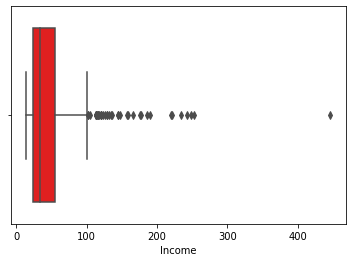

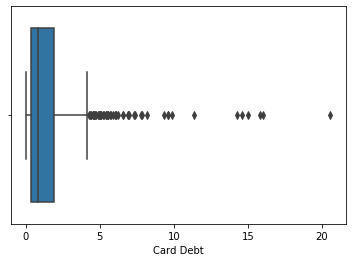

In [34]:
#Write code here
# fig, ax= plt.subplots(ncols=1,figsize=(10,5))
sns.boxplot(x="Income", data=cust, color="red")
plt.show()
sns.boxplot("Card Debt", data=cust)
plt.show()



For Income: The 75th percentile is close to 100, above 50. The 25th percentile is less than 50, closer to 0.
    We can see a few outliers already by looking at the maximum values shown by the boxplots.
    
Similarly, for values closer to 0 we have the 25th percentile, and the 75th percentile is around 2. Again,
    the values towards the far right seem like outliers. 

### **Scatter-plot**

Plot scatter-plot for **Income Vs DebtIncomeRatio**. Comment if it shows any outliers. Use matplotlib.pyplot library for scatter-plot.

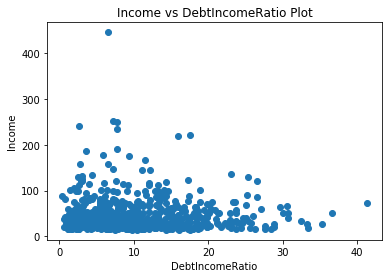

In [35]:
#Write code here
plt.scatter(cust["DebtIncomeRatio"], cust["Income"])
plt.ylabel("Income")
plt.xlabel("DebtIncomeRatio")
plt.title("Income vs DebtIncomeRatio Plot")
plt.show()


We see a few outliers here. Most of the data is packed together but there are outliers where income is very high but the
DebtIncomeRatio is very low. Similarly, we have a moderate income level with a very high (maximum value) for DebtIncomeRation.
DebtIncomeRatio is basically the amount of debt you owe per month relative to your income, so logically the higher your income, the lower the debt ratio
but for some values we don't see this trend.

### **Z_score**

Z-score tells how many standard deviations is a certain data point away from the mean. For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their z-scores.

In [96]:
from scipy.stats import zscore
#Write code here
def find_outliers(zscores, colname):
    outliers_ind=[i for i in range(len(zscores)) if zscores[i]<-3 or zscores[i]>3]
    outliers= np.array(cust[colname])[outliers_ind]
    print(f"Outlier Values for {colname}: {len(outliers)}\n")
    for outlier in outliers: print(outlier)
    print()
    
    return outliers, outliers_ind
    
    
age_Z_score=zscore(cust["Age"])
other_debt_Z_score=zscore(cust["Other Debt"])
DebtIncomeRatio_Z_score=zscore(cust["DebtIncomeRatio"])


age_outliers= [i for i in range(len(age_Z_score)) if age_Z_score[i]<-3 or age_Z_score[i]>3]
ag1, ag2= find_outliers(age_Z_score,"Age")
other_debt_outliers, _= find_outliers(other_debt_Z_score,"Other Debt")
DebtIncomeRatio_outliers, _= find_outliers(DebtIncomeRatio_Z_score, "DebtIncomeRatio")


Outlier Values for Age: 0


Outlier Values for Other Debt: 15

18.257
14.453
15.405
23.104
20.616
17.185
13.050999999999998
15.149000000000001
17.799
18.269000000000002
14.719000000000001
17.204
12.959000000000001
16.668
27.034000000000002

Outlier Values for DebtIncomeRatio: 7

32.5
41.3
35.3
33.3
36.6
30.8
33.4



* **What z-score threshold did you use to detect the outliers and why?**

3. The Z-score standardizes our data and removes any scale from it, the data then follows a distribution where the mean is 0 and standard deviation is 1. 99.7% of the data can typically be found within 3 standard devs of the mean i.e.  -3<x<3 so any point beyond these limits can be classified as an outlier.

### ***IQR***

For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their IQR values.

For this, calculate the first (q1) and third quartile (q3). An outlier is then a data point  that lies outside the interquartile range. That is:
*   *Lower outlier= Q1 - (k x IQR)*
*   *Higher outlier= Q3 + (k x IQR)*

Choose an appropriate 'k' for this part.

In [95]:
#Write code here

def find_outlier_iqr(colname):
    iqr= stats.iqr(cust[colname])
    Q1=cust[colname].quantile(.25)
    Q3=cust[colname].quantile(.75)
    outliers= cust[ (cust[colname]<Q1- 1.5*iqr) | (cust[colname]>Q3+1.5*iqr)][colname]
    if len(outliers)==0:
        print(f"No outliers for {colname}\n")
    else:
        print(f"Outliers for {colname}: {len(outliers)}\n")
        print(outliers.to_string(index=False))
        print()


find_outlier_iqr("Age")
find_outlier_iqr("Other Debt")
find_outlier_iqr("DebtIncomeRatio")



No outliers for Age

Outliers for Other Debt: 48

  8.908
 18.257
 10.184
  9.555
  9.459
 10.754
 14.453
 15.405
 11.874
  9.251
 12.076
 23.104
  8.600
  9.044
  9.737
 11.894
 20.616
 11.724
 11.042
 17.185
 13.051
 12.659
  9.591
  8.502
 15.149
 17.799
 18.269
  9.391
 12.714
 14.719
 17.204
 12.959
  8.399
 16.668
 27.034
  9.704
  9.716
  9.499
 11.663
 12.422
 10.980
 10.631
  9.975
 10.811
  9.198
  8.631
  9.286
  8.362

Outliers for DebtIncomeRatio: 14

 32.5
 29.7
 30.1
 28.9
 28.5
 30.7
 28.9
 41.3
 30.6
 35.3
 33.3
 36.6
 30.8
 33.4



* **What k-value did you use to detect the outliers and why?**
I used k=1.5 because if we look at a normal distribution, then the standard deviation is Q3-Q1. 
99.7% of the data lies within 3 standard deviations from the mean, the rest can be considered outliers i.e. if the data lies to the left of -3 deviations from the mean or to the right of 3 deviations from the mean, then it can be considered an outlier. So, choosing k=1.5 actually gets us very close to this value of 3 that has been standardized for detecting outliers.
IQR= Q3-Q1= std. dev (as described above)=ro
lower bound= Q1-1.5*IQR
upper bound= Q3+1.5*IQR
Q1= -0.675ro, Q3= 0.675ro
lower= -0.675ro - 1.5(0.675ro -(-0.675))= -2.7ro
upper= 0.675ro -1.5(0.675ro - (-0.675))= 2.7ro

so using k=1.5 we get very close to the desired value of 3 which is why I used it. 

* **Which parameter (IQR or Z-score) is better outlier detection? Give reason.**

There is no one superior method for outlier detection, both have their own use cases. It largely depends on the nature of the data. In the plots below we see the distributions of each of our variables and they follow a normal-like distribution and from the visualization we see that our outliers fall in 0.03% of the overall data i.e. they fall outside of 3 devs of the mean. Therefore, the Z-score method works better and it reports lesser number of outliers for this very reason because we use a Z-score value of 3 whereas the IQR method gets approximately close to this 3 deviations value but not actually 3. Z-score also standardizes the data. Overall, for this dataset Z-score is a better method for outlier detection

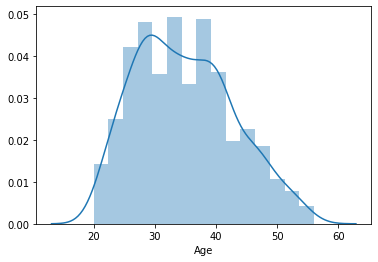

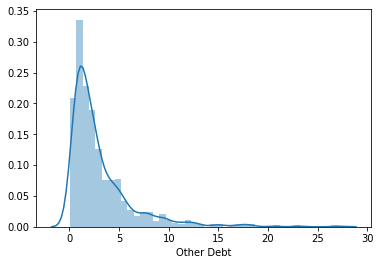

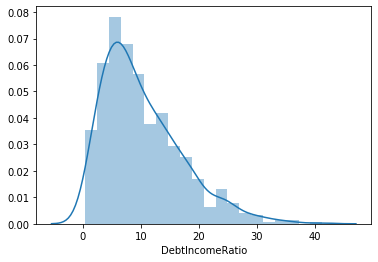

In [108]:
sns.distplot(cust['Age'])
plt.show()
sns.distplot(cust['Other Debt'])
plt.show()
sns.distplot(cust['DebtIncomeRatio'])
plt.show()

### **Outlier Detection using LOC (Local Outlier Factor)**

LOF uses density-based outlier detection to identify local outliers. An anomaly score is assigned to each sample which measures the local deviation of density of a this sample with respect to its neighbors. 



**1.** Tranform the features by scaling them to a 
given range(e.g. 0-1):

In [220]:
from sklearn.preprocessing import MinMaxScaler
#Write your code here
subset=cust[["Income","Other Debt"]]
scaled_data=MinMaxScaler().fit_transform(subset)


**2.** Implement LOC algorithm using sklearn. Choose the parameters that will be passed into the function: 

In [221]:
#Write your code here   
lof= LocalOutlierFactor(n_neighbors=24, contamination="auto")
outliers=lof.fit_predict(scaled_data)
num_outliers=len([outlier for outlier in outliers if outlier==-1])
print("Outliers",num_outliers)


Outliers 25


Run LOC algorithm multiple times with different values for the '**n_neighbors** 'paramater. 

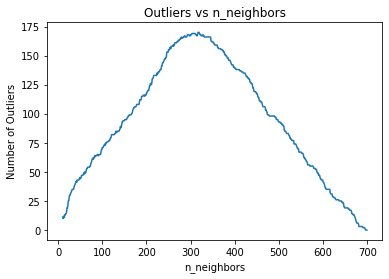

In [222]:
n_values=[i for i in range(10,len(subset))]
n_outliers=[]
for i in range(10,len(subset)):
    lof_i=LocalOutlierFactor(n_neighbors=i, contamination='auto')
    outliers_i=lof_i.fit_predict(scaled_data)
    num_outliers_i=np.count_nonzero(outliers_i==-1)
    n_outliers.append(num_outliers_i)
 
plt.plot(n_values,n_outliers)
plt.title("Outliers vs n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Number of Outliers")
plt.show()

In [223]:
for i in range(10,50):
    print("n_neighbors=", i)
    lof_i=LocalOutlierFactor(n_neighbors=i, contamination='auto')
    outliers_i=lof_i.fit_predict(scaled_data)
    num_outliers_i=np.count_nonzero(outliers_i==-1)
    print(f"Number of Outliers: {num_outliers_i}")


n_neighbors= 10
Number of Outliers: 11
n_neighbors= 11
Number of Outliers: 10
n_neighbors= 12
Number of Outliers: 10
n_neighbors= 13
Number of Outliers: 12
n_neighbors= 14
Number of Outliers: 11
n_neighbors= 15
Number of Outliers: 13
n_neighbors= 16
Number of Outliers: 13
n_neighbors= 17
Number of Outliers: 14
n_neighbors= 18
Number of Outliers: 14
n_neighbors= 19
Number of Outliers: 15
n_neighbors= 20
Number of Outliers: 19
n_neighbors= 21
Number of Outliers: 19
n_neighbors= 22
Number of Outliers: 21
n_neighbors= 23
Number of Outliers: 25
n_neighbors= 24
Number of Outliers: 25
n_neighbors= 25
Number of Outliers: 28
n_neighbors= 26
Number of Outliers: 30
n_neighbors= 27
Number of Outliers: 30
n_neighbors= 28
Number of Outliers: 31
n_neighbors= 29
Number of Outliers: 32
n_neighbors= 30
Number of Outliers: 33
n_neighbors= 31
Number of Outliers: 34
n_neighbors= 32
Number of Outliers: 35
n_neighbors= 33
Number of Outliers: 35
n_neighbors= 34
Number of Outliers: 35
n_neighbors= 35
Number of

* **How did the results of LOC alogrithm vary by changing the value of 'n_neighbors'? What parameter value you ended up choosing and why?**

For this dataset, we see that the LOF algorithm first returns an increasing number of outliers for the values of 10-300 or so for n_neighbors. After that, it reaches its maximum point and starts to decline. This could be due to many reasons, depending on the nature of the dataset. Since it's a density-based approach, and we compare a point's density with the density of n neighbors, that's why the results will vary. <br>

  `n_neighbors=24`<br>

When choosing the number of neighbors, we usually take this value to be greater than the minimum number of points required to be in a cluster. In the paper for LOF, the min value of k was advised to be taken as 10, so I plotted my loop like that. Secondly, n_neighbors must be smaller than the maximum number of close samples that could potentially be outliers. However, we usually don't have this information, so we usually go from 10-n_samples and see which number of outliers seem appropriate for the dataset. 
Generally, taking 20 to be the value works well, and in our case n_neighbors=24 gives us a reasonable number of outliers

**3.** Visualize the results using this function. You may also implement your own visualization function.

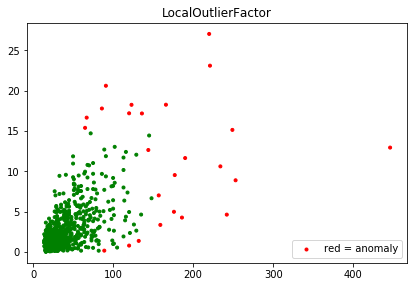

In [224]:
fig = plt.figure(figsize=(15,15))
X=subset
def plot_model(labels, alg_name):
    ax = fig.add_subplot(3,2,1) 
    color_code = {'anomaly':'red', 'normal':'green'}
    color_code={-1:'red', 1:'green'}
    colors = [color_code[x] for x in labels]

    ax.scatter(X.iloc[:,0], X.iloc[:,1], color=colors, marker='.', label='red = anomaly')
    ax.legend(loc="lower right")

    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('red')

    ax.set_title(alg_name)

labels=outliers
plot_model(labels, 'LocalOutlierFactor')


### **Isolation Forest**

Isolation Forest is an outlier detection algoritm that is based on the Decision Trees. It spearates the outliers by randomly selecting a certain attribute and then randomly selecting a split value between the max and min values of this feature.

**1.** Implement Isolation Forest algorithm using sklearn. Choose the parameters that will be passed into the function:

In [226]:
#Write your code here
from sklearn.ensemble import IsolationForest
clf= IsolationForest(max_samples=400, contamination='auto', behaviour="new")
labels=clf.fit_predict(scaled_data)
n_outliers= len([outlier for outlier in labels if outlier==-1])
n_outliers


92

* **What value did you use for the 'max_samples'?**

max_samples= 400 <br>
When max_samples increases, the number of outliers decreases, and by visualization, we see that taking max_samples=400 returns a reasonable number of outliers and most of the closely-knit points are counted as inliers

**2.** Visualize the results using this function. You may also implement your own visualization function.

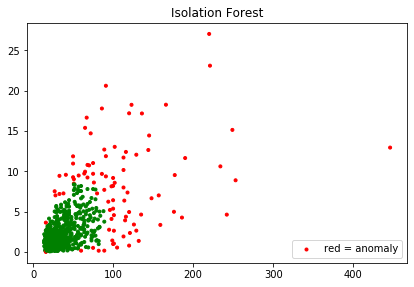

In [227]:
fig = plt.figure(figsize=(15,15))
plot_model(labels, 'Isolation Forest')

* **Compare the results from both LOC and Isolation Forest:** 



*Comparison:*

Isolation Forest returns a much higher number of clusters than LOF and for this dataset, we see that LOF works better because it works well for local outliers and we see here that most points are clustered together. However, it takes longer to run comparatively so there is that trade-off. 

Isolation Forest works well in finding out global clusters and we can see that in the visualization. 
